<a href="https://colab.research.google.com/github/kjh1311990/face/blob/main/align.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
from PIL import Image
import numpy as np
import cv2, math
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Notebooks/haarcascade_frontalface_default.xml')
eye_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Notebooks/haarcascade_eye.xml')
  
def euclidean_distance(a, b):
    x1 = a[0]; y1 = a[1]
    x2 = b[0]; y2 = b[1]
    
    return math.sqrt(((x2 - x1) * (x2 - x1)) + ((y2 - y1) * (y2 - y1)))

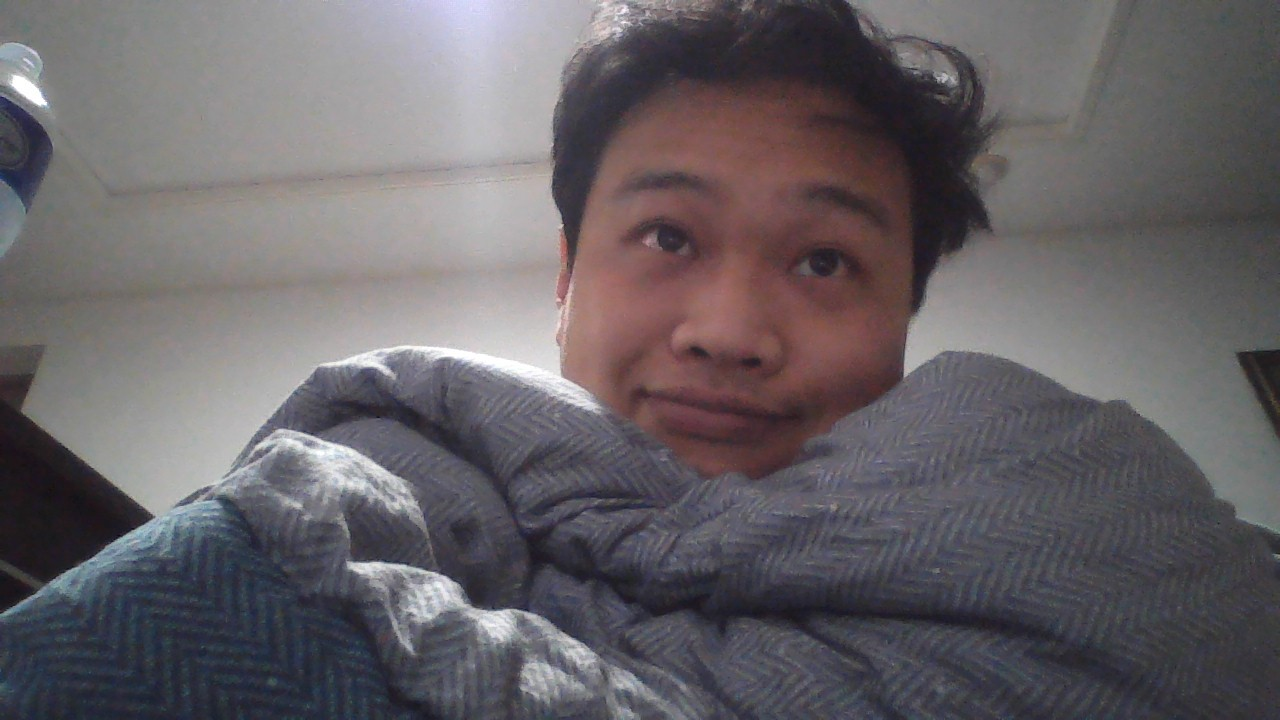

In [27]:
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/drive/MyDrive/Notebooks/face/face.jpg')
img_raw = img.copy();
 
cv2_imshow(img)

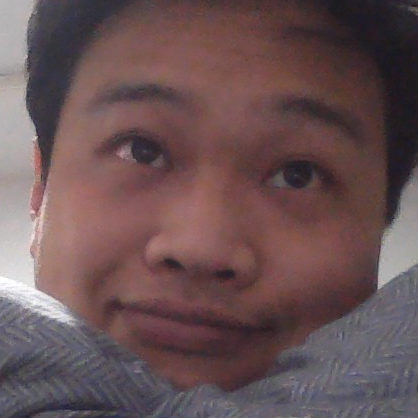

In [28]:
faces = face_detector.detectMultiScale(img, 1.3, 5)
face_x, face_y, face_w, face_h = faces[0]
 
img = img[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]
 
cv2_imshow(img)

In [29]:
#detect eye
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eye_detector.detectMultiScale(img_gray)
 
index = 0
for (eye_x, eye_y, eye_w, eye_h) in eyes:
    if index == 0:
        eye_1 = (eye_x, eye_y, eye_w, eye_h);
    elif index == 1:
        eye_2 = (eye_x, eye_y, eye_w, eye_h);        
    index = index + 1
 
if eye_1[0] < eye_2[0]:
    left_eye = eye_1
    right_eye = eye_2
else:
    left_eye = eye_2
    right_eye = eye_1
    
left_eye_center = (int(left_eye[0] + (left_eye[2] / 2)), int(left_eye[1] + (left_eye[3] / 2)));
left_eye_x = left_eye_center[0]; left_eye_y = left_eye_center[1]
 
right_eye_center = (int(right_eye[0] + (right_eye[2]/2)), int(right_eye[1] + (right_eye[3]/2)));
right_eye_x = right_eye_center[0];
right_eye_y = right_eye_center[1];
 
cv2.circle(img, left_eye_center, 2, (255, 0, 0) , 2)
cv2.circle(img, right_eye_center, 2, (255, 0, 0) , 2)
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)
 
if left_eye_y < right_eye_y:
    point_3rd = (right_eye_x, left_eye_y)
    direction = -1 #rotate same direction to clock
else:
    point_3rd = (left_eye_x, right_eye_y)
    direction = 1 #rotate inverse direction of clock
 
a = euclidean_distance(left_eye_center, point_3rd)
b = euclidean_distance(right_eye_center, left_eye_center)
c = euclidean_distance(right_eye_center, point_3rd)
 
cv2.circle(img, point_3rd, 2, (255, 0, 0) , 2)
 
cv2.line(img,right_eye_center, left_eye_center,(67,67,67),2)
cv2.line(img,left_eye_center, point_3rd,(67,67,67),2)
cv2.line(img,right_eye_center, point_3rd,(67,67,67),2)
 
cos_a = (b*b + c*c - a*a)/(2*b*c)
  
angle = (np.arccos(cos_a) * 180) / math.pi
 
if direction == -1:
    angle = 90 - angle

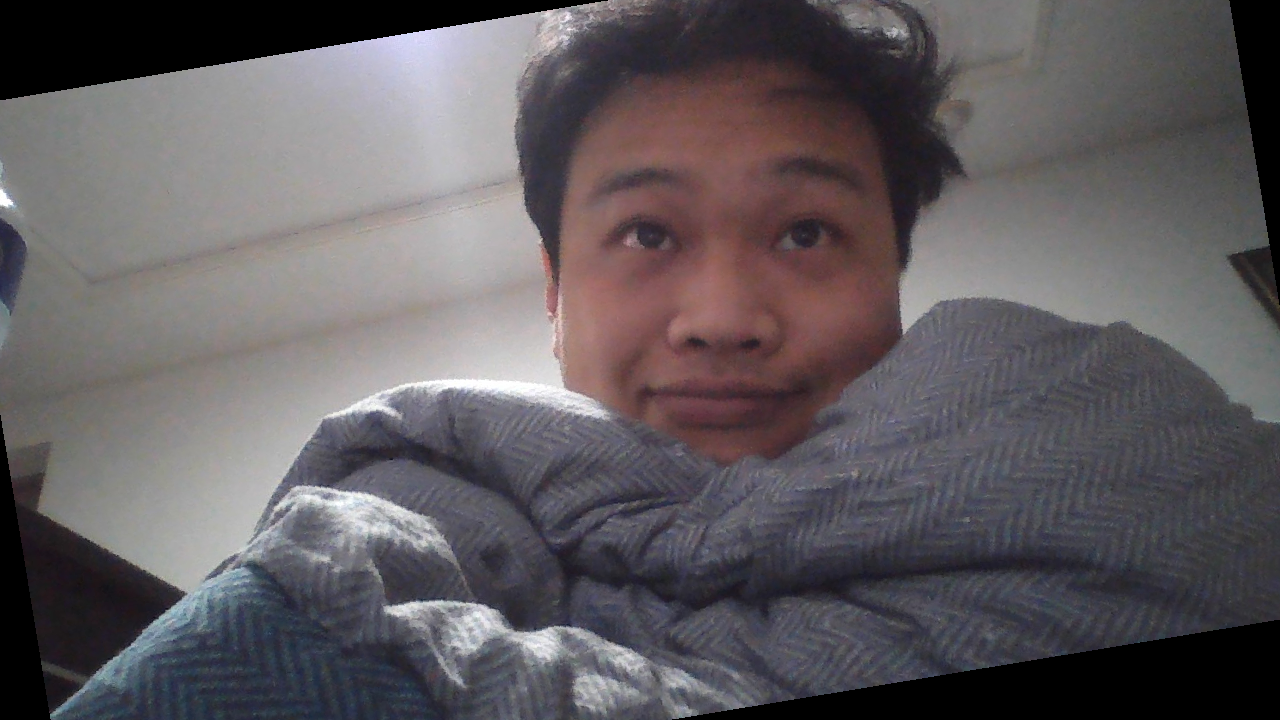

In [30]:
new_img = Image.fromarray(img_raw)
new_img = np.array(new_img.rotate(-direction * angle))
 
cv2_imshow(new_img)

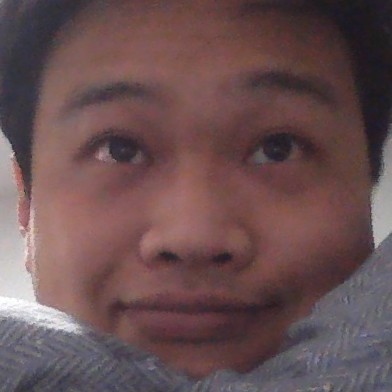

In [31]:
faces = face_detector.detectMultiScale(new_img, 1.3, 5)
face_x, face_y, face_w, face_h = faces[0]
 
new_img = new_img[int(face_y):int(face_y+face_h), int(face_x):int(face_x+face_w)]
 
cv2_imshow(new_img)

In [32]:
cv2.imwrite('/content/drive/MyDrive/Notebooks/face/face6.jpg',new_img)

True